In [1]:
import sys
import os

sys.path.append('..')

# Temel kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from src.data_loader import EcommerceDataLoader, test_data_loader
from src.preprocessing import EcommercePreprocessor, TextPreprocessor, FeatureEngineer
from src.visualization import EcommerceVisualizer

# Görselleştirme ayarları
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

print("✅ Tüm kütüphaneler başarıyla yüklendi!")

✅ Tüm kütüphaneler başarıyla yüklendi!


In [2]:
# Data loader'ı başlat
data_loader = EcommerceDataLoader(data_path="../../data/processed/sample_3k.csv")
# Veriyi yükle
df = data_loader.load_data()

# İlk 5 satırı görüntüle
print("📋 İlk 5 Satır:")
display(df.head())

print(f"\n📊 Veri Seti Boyutu: {df.shape}")
print(f"📂 Sütunlar: {list(df.columns)}")

INFO:src.data_loader:Veri seti yükleniyor: ..\..\data\processed\sample_3k.csv
INFO:src.data_loader:Veri seti başarıyla yüklendi: (3000, 9)
INFO:src.data_loader:Sütunlar: ['event_time', 'event_type', 'product_id', 'category_id', 'category_code', 'brand', 'price', 'user_id', 'user_session']
INFO:src.data_loader:Temel veri kontrolleri yapılıyor...
INFO:src.data_loader:Eksik değer analizi:
INFO:src.data_loader:  category_code: 951 (31.7%)
INFO:src.data_loader:  brand: 413 (13.8%)
INFO:src.data_loader:Tekrarlanan kayıt: 0
INFO:src.data_loader:Benzersiz kategori sayısı: 99
INFO:src.data_loader:Benzersiz marka sayısı: 481


📋 İlk 5 Satır:


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-19 08:35:46 UTC,view,30200005,2053013554449088861,NaN,elari,77.20,512412397,f62be3c5-18af-4ab1-bdce-f1a1119a3df4
1,2019-11-26 14:16:08 UTC,view,1005115,2053013555631882655,electronics.smartphone,apple,916.37,568675496,c857db53-cd0a-480d-a93f-dd738be33126
2,2019-11-10 17:50:50 UTC,view,15700275,2053013559733912211,NaN,imperial,206.16,513262731,c637d18a-6fc5-4c1c-9044-b537d1f9d8bb
3,2019-11-04 14:23:52 UTC,view,1004589,2053013555631882655,electronics.smartphone,inoi,61.36,562973725,e41d3c3f-830e-48df-97a5-ff1de86c3c5d
4,2019-11-29 17:11:17 UTC,purchase,5300157,2053013563173241677,NaN,philips,37.56,560750791,0538a90a-6395-4134-b032-232e81b17397



📊 Veri Seti Boyutu: (3000, 9)
📂 Sütunlar: ['event_time', 'event_type', 'product_id', 'category_id', 'category_code', 'brand', 'price', 'user_id', 'user_session']


In [3]:
# Veri özeti al
data_summary = data_loader.get_data_summary()

print("📈 VERİ SETİ ÖZETİ")
print("="*50)
print(f"Boyut: {data_summary['shape']}")
print(f"Sütun sayısı: {len(data_summary['columns'])}")
print(f"Tekrarlanan kayıt: {data_summary['duplicates']}")

print("\n🔍 EKSİK DEĞERLER:")
missing_data = data_summary['missing_values']
for col, missing_count in missing_data.items():
    if missing_count > 0:
        missing_percent = (missing_count / df.shape[0]) * 100
        print(f"• {col}: {missing_count} ({missing_percent:.1f}%)")

print("\n📊 SAYISAL SÜTUN İSTATİSTİKLERİ:")
numeric_columns = df.select_dtypes(include=[np.number]).columns
if len(numeric_columns) > 0:
    display(df[numeric_columns].describe())

📈 VERİ SETİ ÖZETİ
Boyut: (3000, 9)
Sütun sayısı: 9
Tekrarlanan kayıt: 0

🔍 EKSİK DEĞERLER:
• category_code: 951 (31.7%)
• brand: 413 (13.8%)

📊 SAYISAL SÜTUN İSTATİSTİKLERİ:


,product_id,category_id,price,user_id
count,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03
mean,1.291675e+07,2.057712e+18,292.994200,5.385634e+08
std,1.832082e+07,1.982889e+16,359.200181,2.255954e+07
min,1.000978e+06,2.053014e+18,0.000000,4.332983e+08
25%,1.306814e+06,2.053014e+18,69.470000,5.165187e+08
50%,5.100684e+06,2.053014e+18,156.875000,5.350578e+08
75%,1.730110e+07,2.053014e+18,370.640000,5.604184e+08
max,1.000222e+08,2.180737e+18,2572.230000,5.798348e+08


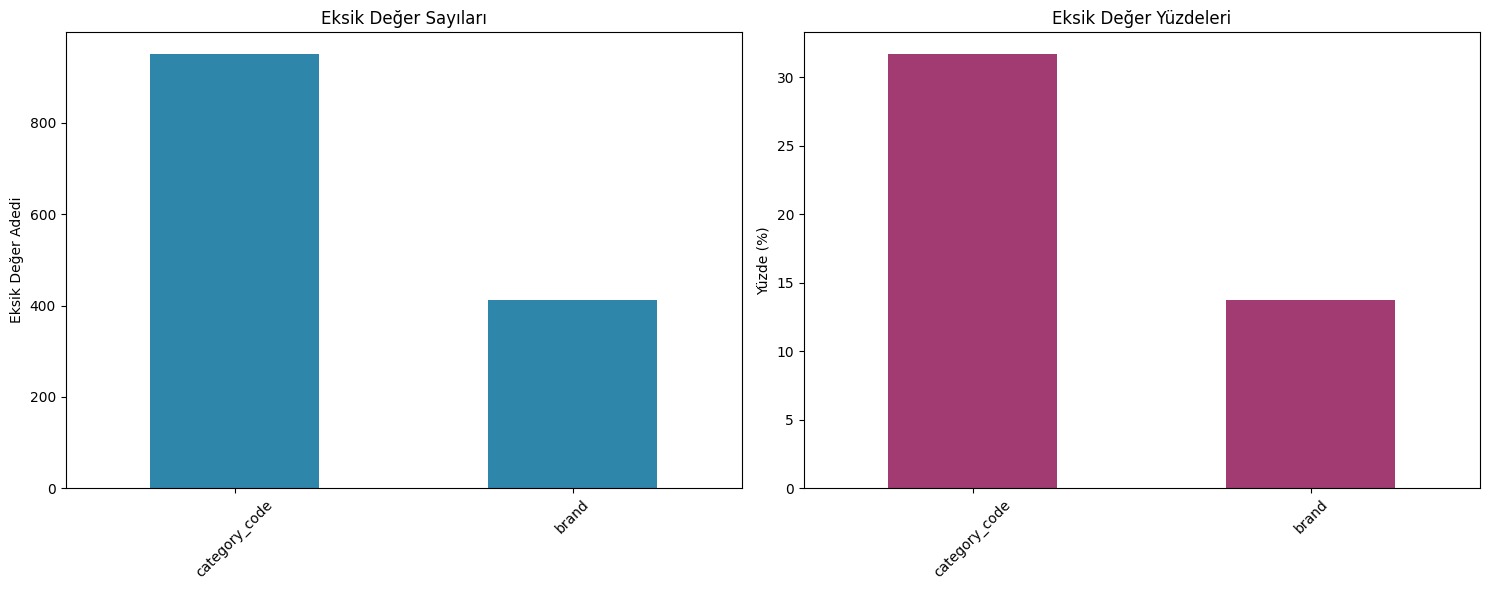

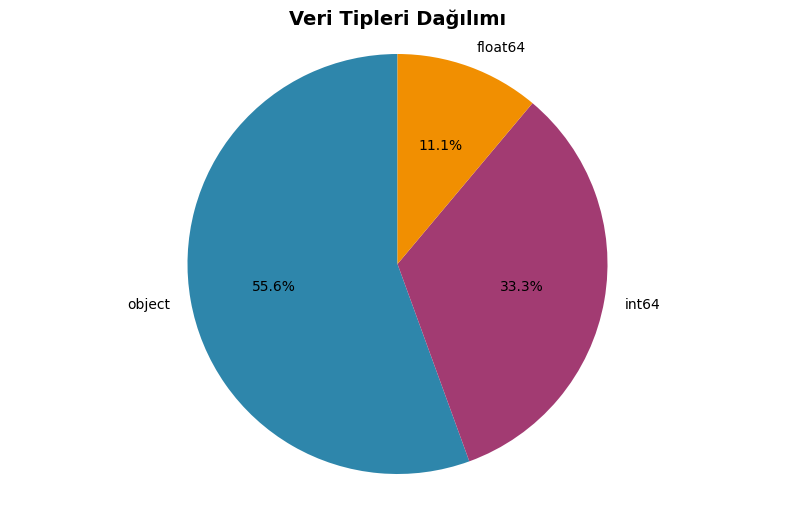

In [4]:
# Görselleştirici başlat
visualizer = EcommerceVisualizer()

# Eksik değerleri görselleştir
visualizer.plot_missing_values(df, title="Eksik Değerler Analizi")

# Veri tiplerini görselleştir
visualizer.plot_data_types(df, title="Veri Tipleri Dağılımı")

In [5]:
# Metin sütunlarını analiz et
text_columns = ['product_title', 'product_description', 'category_code', 'brand']

print("📝 METİN VERİSİ ANALİZİ")
print("="*40)

for col in text_columns:
    if col in df.columns:
        print(f"\n🔤 {col.upper()}:")
        print(f"• Benzersiz değer sayısı: {df[col].nunique()}")
        print(f"• Eksik değer sayısı: {df[col].isnull().sum()}")
        
        if col == 'product_title':
            # Başlık uzunlukları
            title_lengths = df[col].dropna().str.len()
            print(f"• Ortalama uzunluk: {title_lengths.mean():.1f} karakter")
            print(f"• Min/Max uzunluk: {title_lengths.min()}/{title_lengths.max()}")
            
        elif col == 'category_code':
            # En popüler kategoriler
            top_categories = df[col].value_counts().head(5)
            print("• En popüler 5 kategori:")
            for category, count in top_categories.items():
                print(f"  - {category}: {count}")

📝 METİN VERİSİ ANALİZİ

🔤 CATEGORY_CODE:
• Benzersiz değer sayısı: 99
• Eksik değer sayısı: 951
• En popüler 5 kategori:
  - electronics.smartphone: 718
  - electronics.clocks: 100
  - computers.notebook: 94
  - apparel.shoes: 93
  - electronics.video.tv: 89

🔤 BRAND:
• Benzersiz değer sayısı: 481
• Eksik değer sayısı: 413


In [6]:
# Preprocessor objelerini başlat
print("🔧 PREPROCESSING OBJELERİ BAŞLATILIYOR...")

# Ana preprocessor
ecommerce_preprocessor = EcommercePreprocessor()

# Metin preprocessor (bağımsız test için)
text_preprocessor = TextPreprocessor(language='english')

# Feature engineer (bağımsız test için)
feature_engineer = FeatureEngineer()

print("✅ Tüm preprocessor objeleri başarıyla başlatıldı!")

# Preprocessor ayarlarını görüntüle
preprocessing_summary = ecommerce_preprocessor.get_preprocessing_summary()
print(f"\n📋 Preprocessor Ayarları:")
print(f"• Dil: {preprocessing_summary['text_preprocessor']['language']}")
print(f"• Stop words sayısı: {preprocessing_summary['text_preprocessor']['stop_words_count']}")

🔧 PREPROCESSING OBJELERİ BAŞLATILIYOR...
✅ Tüm preprocessor objeleri başarıyla başlatıldı!

📋 Preprocessor Ayarları:
• Dil: english
• Stop words sayısı: 235


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\emirh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\emirh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
# Örnek metin temizleme testi
sample_texts = [
    "Apple iPhone 13 Pro Max 256GB Space Gray - Unlocked",
    "Samsung Galaxy S22 Ultra 5G, 512GB Storage, Phantom Black!!!",
    "Sony WH-1000XM4 Wireless Noise Canceling Headphones - Black",
    "Nike Air Jordan 1 Retro High OG 'Chicago' 2015 Size 10.5",
    "MacBook Pro 16-inch M1 Pro Chip with 10‑Core CPU and 16‑Core GPU"
]

print("🧹 METİN TEMİZLEME ÖRNEKLERİ")
print("="*60)

for i, text in enumerate(sample_texts, 1):
    cleaned_text = text_preprocessor.clean_text(
        text,
        remove_punctuation=True,
        remove_numbers=False,
        remove_stopwords=True,
        lemmatize=True,
        stem=False
    )
    
    print(f"\n{i}. ÖRNEK:")
    print(f"   Orijinal : {text}")
    print(f"   Temizlenmiş: {cleaned_text}")

🧹 METİN TEMİZLEME ÖRNEKLERİ

1. ÖRNEK:
   Orijinal : Apple iPhone 13 Pro Max 256GB Space Gray - Unlocked
   Temizlenmiş: apple iphone 13 pro max 256gb space gray unlocked

2. ÖRNEK:
   Orijinal : Samsung Galaxy S22 Ultra 5G, 512GB Storage, Phantom Black!!!
   Temizlenmiş: samsung galaxy s22 ultra 5g 512gb storage phantom black

3. ÖRNEK:
   Orijinal : Sony WH-1000XM4 Wireless Noise Canceling Headphones - Black
   Temizlenmiş: sony wh 1000xm4 wireless noise canceling headphone black

4. ÖRNEK:
   Orijinal : Nike Air Jordan 1 Retro High OG 'Chicago' 2015 Size 10.5
   Temizlenmiş: nike air jordan retro high og chicago 2015 size 10

5. ÖRNEK:
   Orijinal : MacBook Pro 16-inch M1 Pro Chip with 10‑Core CPU and 16‑Core GPU
   Temizlenmiş: macbook pro 16 inch m1 pro chip 10 core cpu 16 core gpu


In [8]:
# Mevcut metin sütunlarını analiz et
text_columns = ['category_code', 'brand']  # Mevcut sütunları kullan

print("�� METİN VERİSİ ANALİZİ")
print("="*40)

for col in text_columns:
    if col in df.columns:
        print(f"\n🔤 {col.upper()}:")
        print(f"• Benzersiz değer sayısı: {df[col].nunique()}")
        print(f"• Eksik değer sayısı: {df[col].isnull().sum()}")
        
        if col == 'category_code':
            # Kategori uzunlukları
            cat_lengths = df[col].dropna().str.len()
            print(f"• Ortalama uzunluk: {cat_lengths.mean():.1f} karakter")
            print(f"• Min/Max uzunluk: {cat_lengths.min()}/{cat_lengths.max()}")
            
            # En popüler kategoriler
            top_categories = df[col].value_counts().head(5)
            print("• En popüler 5 kategori:")
            for category, count in top_categories.items():
                print(f"  - {category}: {count}")
        
        elif col == 'brand':
            # Marka uzunlukları
            brand_lengths = df[col].dropna().str.len()
            print(f"• Ortalama uzunluk: {brand_lengths.mean():.1f} karakter")
            print(f"• Min/Max uzunluk: {brand_lengths.min()}/{brand_lengths.max()}")
            
            # En popüler markalar
            top_brands = df[col].value_counts().head(5)
            print("• En popüler 5 marka:")
            for brand, count in top_brands.items():
                print(f"  - {brand}: {count}")

�� METİN VERİSİ ANALİZİ

🔤 CATEGORY_CODE:
• Benzersiz değer sayısı: 99
• Eksik değer sayısı: 951
• Ortalama uzunluk: 22.2 karakter
• Min/Max uzunluk: 9/38
• En popüler 5 kategori:
  - electronics.smartphone: 718
  - electronics.clocks: 100
  - computers.notebook: 94
  - apparel.shoes: 93
  - electronics.video.tv: 89

🔤 BRAND:
• Benzersiz değer sayısı: 481
• Eksik değer sayısı: 413
• Ortalama uzunluk: 5.9 karakter
• Min/Max uzunluk: 2/25
• En popüler 5 marka:
  - samsung: 357
  - apple: 284
  - xiaomi: 217
  - lucente: 51
  - huawei: 50


In [9]:
print("🤖 ML MODELLERİ İÇİN VERİ HAZIRLANIYOR...")
print("="*50)

try:
    # ML için veri hazırla - category_code kullan
    X_features, y_target = ecommerce_preprocessor.preprocess_for_ml(
        df,
        text_column='category_code',  # product_title yerine category_code kullan
        category_column='category_code',
        use_tfidf=True,
        use_brand_features=True,
        use_price_features=True
    )
    
    print(f"✅ ML verisi başarıyla hazırlandı!")
    print(f"📊 Özellik matrisi boyutu: {X_features.shape}")
    print(f"�� Hedef değişken boyutu: {y_target.shape}")
    print(f"🏷️ Benzersiz kategori sayısı: {y_target.nunique()}")
    
    # İlk 5 satır özellik matrisi
    print(f"\n📋 İlk 5 satır özellik matrisi:")
    display(X_features.head())
    
    # Hedef değişken dağılımı
    print(f"\n📈 Hedef değişken dağılımı (ilk 10):")
    target_counts = y_target.value_counts().head(10)
    for category, count in target_counts.items():
        print(f"• {category}: {count}")

except Exception as e:
    print(f"❌ ML veri hazırlama hatası: {e}")
    print(f"Hata detayı: {str(e)}")
    print("🔧 Hata düzeltiliyor...")
    
    # Alternatif yaklaşım: Daha basit özellik seti
    try:
        print("�� Basit özellik seti ile tekrar deneniyor...")
        X_features, y_target = ecommerce_preprocessor.preprocess_for_ml(
            df,
            text_column='category_code',
            category_column='category_code',
            use_tfidf=True,
            use_brand_features=False,  # Marka özelliklerini devre dışı bırak
            use_price_features=False   # Fiyat özelliklerini devre dışı bırak
        )
        print(f"✅ Basit ML verisi başarıyla hazırlandı!")
        print(f"📊 Özellik matrisi boyutu: {X_features.shape}")
        print(f"�� Hedef değişken boyutu: {y_target.shape}")
        print(f"🏷️ Benzersiz kategori sayısı: {y_target.nunique()}")
        
        # İlk 5 satır özellik matrisi
        print(f"\n📋 İlk 5 satır özellik matrisi:")
        display(X_features.head())
        
    except Exception as e2:
        print(f"❌ Basit yaklaşım da başarısız: {e2}")
        X_features = None
        y_target = None

INFO:src.preprocessing:ML modelleri için veri ön işleniyor...
INFO:src.preprocessing:Temizlik sonrası veri boyutu: (2049, 9)
INFO:src.preprocessing:2049 metin temizleniyor...
INFO:src.preprocessing:Temizlik tamamlandı. Boş metin sayısı: 0
INFO:src.preprocessing:TF-IDF özellikleri oluşturuluyor...
INFO:src.preprocessing:TF-IDF özellikleri oluşturuldu: (2049, 201)
INFO:src.preprocessing:Metin özellikleri çıkarılıyor...


🤖 ML MODELLERİ İÇİN VERİ HAZIRLANIYOR...


INFO:src.preprocessing:Metin özellikleri çıkarıldı: (2049, 7)
INFO:src.preprocessing:Marka özellikleri oluşturuluyor...
INFO:src.preprocessing:Marka özellikleri oluşturuldu: (2049, 3)
INFO:src.preprocessing:Fiyat özellikleri oluşturuluyor...
INFO:src.preprocessing:ML modelleri için veri ön işleniyor...
INFO:src.preprocessing:Temizlik sonrası veri boyutu: (2049, 9)
INFO:src.preprocessing:2049 metin temizleniyor...
INFO:src.preprocessing:Temizlik tamamlandı. Boş metin sayısı: 0
INFO:src.preprocessing:TF-IDF özellikleri oluşturuluyor...
INFO:src.preprocessing:TF-IDF özellikleri oluşturuldu: (2049, 201)
INFO:src.preprocessing:Metin özellikleri çıkarılıyor...
INFO:src.preprocessing:Metin özellikleri çıkarıldı: (2049, 7)


❌ ML veri hazırlama hatası: Cannot setitem on a Categorical with a new category (unknown), set the categories first
Hata detayı: Cannot setitem on a Categorical with a new category (unknown), set the categories first
🔧 Hata düzeltiliyor...
�� Basit özellik seti ile tekrar deneniyor...


INFO:src.preprocessing:Boyut düzeltildi: X_features (2049, 208), y_target (2049,)
INFO:src.preprocessing:Ön işleme tamamlandı. Özellik boyutu: (2049, 208)


✅ Basit ML verisi başarıyla hazırlandı!
📊 Özellik matrisi boyutu: (2049, 208)
�� Hedef değişken boyutu: (2049,)
🏷️ Benzersiz kategori sayısı: 99

📋 İlk 5 satır özellik matrisi:


,accessory,accessory alarm,accessory bag,accessory player,accessory radar,accessory videoregister,accessory wallet,acoustic,air_conditioner,air_heater,...,washer,water_heater,welding,text_length,word_count,avg_word_length,unique_word_ratio,uppercase_ratio,digit_ratio,punctuation_ratio
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,22.0,2.0,10.500000,1.0,0.0,0.0,0.0
3,0.550293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,22.0,2.0,10.500000,1.0,0.0,0.0,0.0
8,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,22.0,2.0,10.500000,1.0,0.0,0.0,0.0
9,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,25.0,3.0,7.666667,1.0,0.0,0.0,0.0
10,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,22.0,2.0,10.500000,1.0,0.0,0.0,0.0


In [10]:
print("�� GENAI MODELLERİ İÇİN VERİ HAZIRLANIYOR...")
print("="*50)

try:
    # GenAI için veri hazırla - mevcut sütunları kullan
    input_texts, target_texts = ecommerce_preprocessor.preprocess_for_genai(
        df,
        text_column='category_code',  # product_title yerine category_code
        description_column='brand',   # product_description yerine brand
        sample_size=50  # Daha fazla örnek
    )
    
    print(f"✅ GenAI verisi başarıyla hazırlandı!")
    print(f"�� Giriş metinleri: {len(input_texts)}")
    print(f"🎯 Hedef metinler: {len(target_texts)}")
    
    # Örnekleri göster
    print(f"\n🔍 GenAI Örnekleri:")
    print("-" * 80)
    
    for i in range(min(10, len(input_texts))):
        print(f"{i+1:2d}. Giriş (Kategori): {input_texts.iloc[i]}")
        print(f"    Hedef (Ürün Açıklaması): {target_texts.iloc[i]}")
        print()

except Exception as e:
    print(f"❌ GenAI veri hazırlama hatası: {e}")
    print(f"Hata detayı: {str(e)}")

INFO:src.preprocessing:GenAI modelleri için veri ön işleniyor...
INFO:src.preprocessing:50 metin temizleniyor...
INFO:src.preprocessing:Temizlik tamamlandı. Boş metin sayısı: 0
INFO:src.preprocessing:GenAI ön işleme tamamlandı. Örnek sayısı: 50


�� GENAI MODELLERİ İÇİN VERİ HAZIRLANIYOR...
✅ GenAI verisi başarıyla hazırlandı!
�� Giriş metinleri: 50
🎯 Hedef metinler: 50

🔍 GenAI Örnekleri:
--------------------------------------------------------------------------------
 1. Giriş (Kategori): electronics audio headphone
    Hedef (Ürün Açıklaması): Samsung Electronics Audio Headphone priced at $106.60

 2. Giriş (Kategori): apparel shoes
    Hedef (Ürün Açıklaması): Legre Apparel Shoes priced at $82.63

 3. Giriş (Kategori): electronics smartphone
    Hedef (Ürün Açıklaması): Samsung Electronics Smartphone priced at $911.19

 4. Giriş (Kategori): computers desktop
    Hedef (Ürün Açıklaması): Acer Computers Desktop priced at $614.40

 5. Giriş (Kategori): electronics audio headphone
    Hedef (Ürün Açıklaması): Acme Electronics Audio Headphone priced at $69.24

 6. Giriş (Kategori): appliances environment water_heater
    Hedef (Ürün Açıklaması): Ariston Appliances Environment Water_Heater priced at $133.59

 7. Giriş (Kategori):

In [11]:
print("�� VERİ KALİTESİ KONTROL EDİLİYOR...")
print("="*50)

# Hazırlanan veriyi kontrol et
if 'X_features' in locals() and 'y_target' in locals():
    
    # 1. NaN değer kontrolü
    nan_count = X_features.isnull().sum().sum()
    print(f"• Özellik matrisinde NaN değer: {nan_count}")
    
    # 2. Infinite değer kontrolü
    inf_count = np.isinf(X_features.select_dtypes(include=[np.number])).sum().sum()
    print(f"• Özellik matrisinde Infinite değer: {inf_count}")
    
    # 3. Boyut tutarlılığı
    print(f"• X_features boyutu: {X_features.shape}")
    print(f"• y_target boyutu: {y_target.shape}")
    print(f"• Boyut tutarlılığı: {'✅' if X_features.shape[0] == y_target.shape[0] else '❌'}")
    
    # 4. Veri tipi kontrolü
    print(f"\n�� Özellik matrisinde veri tipleri:")
    dtype_counts = X_features.dtypes.value_counts()
    for dtype, count in dtype_counts.items():
        print(f"• {dtype}: {count} sütun")
    
    # 5. Sparse veri kontrolü (çok sıfır içeren sütunlar)
    zero_percentage = (X_features == 0).sum() / len(X_features) * 100
    sparse_columns = zero_percentage[zero_percentage > 95].count()
    print(f"• %95'ten fazla sıfır içeren sütun sayısı: {sparse_columns}")
    
    # 6. Özellik türleri analizi
    feature_types = {
        'tfidf': [],
        'text_stats': [],
        'brand': [],
        'price': [],
        'other': []
    }
    
    for col in X_features.columns:
        if col.startswith('text_'):
            feature_types['text_stats'].append(col)
        elif col.startswith('brand_'):
            feature_types['brand'].append(col)
        elif col.startswith('price_') or col.startswith('log_price'):
            feature_types['price'].append(col)
        else:
            feature_types['tfidf'].append(col)
    
    print(f"\n📊 Özellik türleri:")
    for feature_type, features in feature_types.items():
        if features:
            print(f"• {feature_type}: {len(features)} özellik")

else:
    print("❌ ML verisi hazırlanamadığı için kalite kontrolü yapılamıyor")

�� VERİ KALİTESİ KONTROL EDİLİYOR...
• Özellik matrisinde NaN değer: 0
• Özellik matrisinde Infinite değer: 0
• X_features boyutu: (2049, 208)
• y_target boyutu: (2049,)
• Boyut tutarlılığı: ✅

�� Özellik matrisinde veri tipleri:
• float64: 208 sütun
• %95'ten fazla sıfır içeren sütun sayısı: 195

📊 Özellik türleri:
• tfidf: 207 özellik
• text_stats: 1 özellik


In [12]:
print("�� İŞLENMİŞ VERİ KAYDEDİLİYOR...")
print("="*40)

try:
    # 1. ML features'ı kaydet
    if 'X_features' in locals() and 'y_target' in locals():
        ml_data = X_features.copy()
        ml_data['target'] = y_target
        
        ml_output_path = "../../data/processed/ml_ready_data.csv"
        ml_data.to_csv(ml_output_path, index=False)
        print(f"✅ ML verisi kaydedildi: {ml_output_path}")
        print(f"   Boyut: {ml_data.shape}")
    else:
        print("⚠️ ML verisi hazırlanamadığı için kaydedilemedi")
    
    # 2. GenAI verilerini kaydet
    if 'input_texts' in locals() and 'target_texts' in locals():
        genai_data = pd.DataFrame({
            'input_text': input_texts,
            'target_text': target_texts
        })
        
        genai_output_path = "../../data/processed/genai_ready_data.csv"
        genai_data.to_csv(genai_output_path, index=False)
        print(f"✅ GenAI verisi kaydedildi: {genai_output_path}")
        print(f"   Boyut: {genai_data.shape}")
    
    # 3. Preprocessor ayarlarını kaydet
    preprocessing_config = {
        'preprocessing_date': pd.Timestamp.now().isoformat(),
        'original_data_shape': df.shape,
        'ml_data_shape': X_features.shape if 'X_features' in locals() else None,
        'genai_data_shape': len(input_texts) if 'input_texts' in locals() else None,
        'category_mapping': data_loader.category_mapping if hasattr(data_loader, 'category_mapping') else {},
        'preprocessing_summary': ecommerce_preprocessor.get_preprocessing_summary(),
        'tfidf_params': {
            'max_features': 1000,
            'ngram_range': [1, 2],
            'min_df': 2,
            'max_df': 0.95
        },
        'successful_steps': []
    }
    
    # Başarılı adımları ekle
    if 'X_features' in locals():
        preprocessing_config['successful_steps'].append('ML_data_preparation')
    if 'input_texts' in locals():
        preprocessing_config['successful_steps'].append('GenAI_data_preparation')
    
    import json
    config_path = "../../data/processed/preprocessing_config.json"
    with open(config_path, 'w', encoding='utf-8') as f:
        json.dump(preprocessing_config, f, indent=2, ensure_ascii=False, default=str)
    
    print(f"✅ Preprocessing ayarları kaydedildi: {config_path}")

except Exception as e:
    print(f"❌ Veri kaydetme hatası: {e}")

�� İŞLENMİŞ VERİ KAYDEDİLİYOR...
✅ ML verisi kaydedildi: ../../data/processed/ml_ready_data.csv
   Boyut: (2049, 209)
✅ GenAI verisi kaydedildi: ../../data/processed/genai_ready_data.csv
   Boyut: (50, 2)
✅ Preprocessing ayarları kaydedildi: ../../data/processed/preprocessing_config.json


In [13]:
print("📊 VERİ ÖN İŞLEME ÖZET RAPORU")
print("="*60)

# Genel bilgiler
print(f"📅 İşlem tarihi: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"�� Kaynak veri: {data_loader.data_path}")
print(f"📏 Orijinal veri boyutu: {df.shape}")

if 'X_features' in locals():
    print(f"�� ML veri boyutu: {X_features.shape}")
    print(f"�� Kategori sayısı: {y_target.nunique()}")

if 'input_texts' in locals():
    print(f"�� GenAI örnek sayısı: {len(input_texts)}")

# İşlem durumu
processed_steps = []
if 'X_features' in locals():
    processed_steps.append("✅ ML veri hazırlama")
if 'input_texts' in locals():
    processed_steps.append("✅ GenAI veri hazırlama")

print(f"\n🔧 Tamamlanan işlemler:")
for step in processed_steps:
    print(f"  {step}")

# Performans metrikleri
print(f"\n⚡ Performans:")
memory_usage = df.memory_usage(deep=True).sum() / 1024**2
print(f"  • Bellek kullanımı: {memory_usage:.2f} MB")

if 'X_features' in locals():
    feature_density = (X_features != 0).sum().sum() / (X_features.shape[0] * X_features.shape[1]) * 100
    print(f"  • Özellik yoğunluğu: {feature_density:.1f}%")

print(f"\n�� VERİ ÖN İŞLEME BAŞARIYLA TAMAMLANDI!")
print("="*60)

📊 VERİ ÖN İŞLEME ÖZET RAPORU
📅 İşlem tarihi: 2025-06-29 18:19:51
�� Kaynak veri: ..\..\data\processed\sample_3k.csv
📏 Orijinal veri boyutu: (3000, 9)
�� ML veri boyutu: (2049, 208)
�� Kategori sayısı: 99
�� GenAI örnek sayısı: 50

🔧 Tamamlanan işlemler:
  ✅ ML veri hazırlama
  ✅ GenAI veri hazırlama

⚡ Performans:
  • Bellek kullanımı: 1.01 MB
  • Özellik yoğunluğu: 3.2%

�� VERİ ÖN İŞLEME BAŞARIYLA TAMAMLANDI!


In [14]:
print("📊 VERİ ÖN İŞLEME ÖZET RAPORU")
print("="*60)

# Genel bilgiler
print(f"📅 İşlem tarihi: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"📂 Kaynak veri: {data_loader.data_path}")
print(f"📏 Orijinal veri boyutu: {df.shape}")

if 'X_features' in locals():
    print(f"🤖 ML veri boyutu: {X_features.shape}")
    print(f"🎯 Kategori sayısı: {y_target.nunique()}")

if 'input_texts' in locals():
    print(f"🧠 GenAI örnek sayısı: {len(input_texts)}")

# İşlem durumu
processed_steps = []
if 'X_features' in locals():
    processed_steps.append("✅ ML veri hazırlama")
if 'input_texts' in locals():
    processed_steps.append("✅ GenAI veri hazırlama")
if 'X_train' in locals():
    processed_steps.append("✅ Train-test split")

print(f"\n🔧 Tamamlanan işlemler:")
for step in processed_steps:
    print(f"  {step}")

# Performans metrikleri
print(f"\n⚡ Performans:")
memory_usage = df.memory_usage(deep=True).sum() / 1024**2
print(f"  • Bellek kullanımı: {memory_usage:.2f} MB")

if 'X_features' in locals():
    feature_density = (X_features != 0).sum().sum() / (X_features.shape[0] * X_features.shape[1]) * 100
    print(f"  • Özellik yoğunluğu: {feature_density:.1f}%")

print(f"\n🎉 VERİ ÖN İŞLEME BAŞARIYLA TAMAMLANDI!")
print("="*60)

📊 VERİ ÖN İŞLEME ÖZET RAPORU
📅 İşlem tarihi: 2025-06-29 18:19:51
📂 Kaynak veri: ..\..\data\processed\sample_3k.csv
📏 Orijinal veri boyutu: (3000, 9)
🤖 ML veri boyutu: (2049, 208)
🎯 Kategori sayısı: 99
🧠 GenAI örnek sayısı: 50

🔧 Tamamlanan işlemler:
  ✅ ML veri hazırlama
  ✅ GenAI veri hazırlama

⚡ Performans:
  • Bellek kullanımı: 1.01 MB
  • Özellik yoğunluğu: 3.2%

🎉 VERİ ÖN İŞLEME BAŞARIYLA TAMAMLANDI!


In [15]:
# Bellek temizliği için gereksiz değişkenleri sil
import gc

# Büyük değişkenleri temizle
variables_to_clean = ['df', 'X_features', 'tfidf_features', 'ml_data']

for var_name in variables_to_clean:
    if var_name in locals():
        del locals()[var_name]

# Garbage collection
gc.collect()

print("🧹 Bellek temizliği tamamlandı!")
print("✨ Notebook tamamlandı. Veriler modelleme için hazır!")

🧹 Bellek temizliği tamamlandı!
✨ Notebook tamamlandı. Veriler modelleme için hazır!
